In [1]:
import os
os.environ["HUGGINGFACE_HUB_CACHE"] = "/data/sshadmin/bocheng/.cache/huggingface/hub/"

In [2]:
import torch
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image, make_image_grid

pipeline = AutoPipelineForImage2Image.from_pretrained(
    "kandinsky-community/kandinsky-2-2-decoder",
    torch_dtype=torch.float16,
    use_safetensors=True,
)
pipeline.enable_model_cpu_offload()
pipeline.enable_xformers_memory_efficient_attention()

Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/data/sshadmin/bocheng/soft/installed/miniconda3/envs/torch/lib/python3.11/site-packages/diffusers/pipelines/kandinsky2_2/pipeline_kandinsky2_2_img2img.py:276: FutureWarning: `callback_steps` is deprecated and will be removed in version 1.0.0. Passing `callback_steps` as an input argument to `__call__` is deprecated, consider use `callback_on_step_end`
  deprecate(


  0%|          | 0/30 [00:00<?, ?it/s]

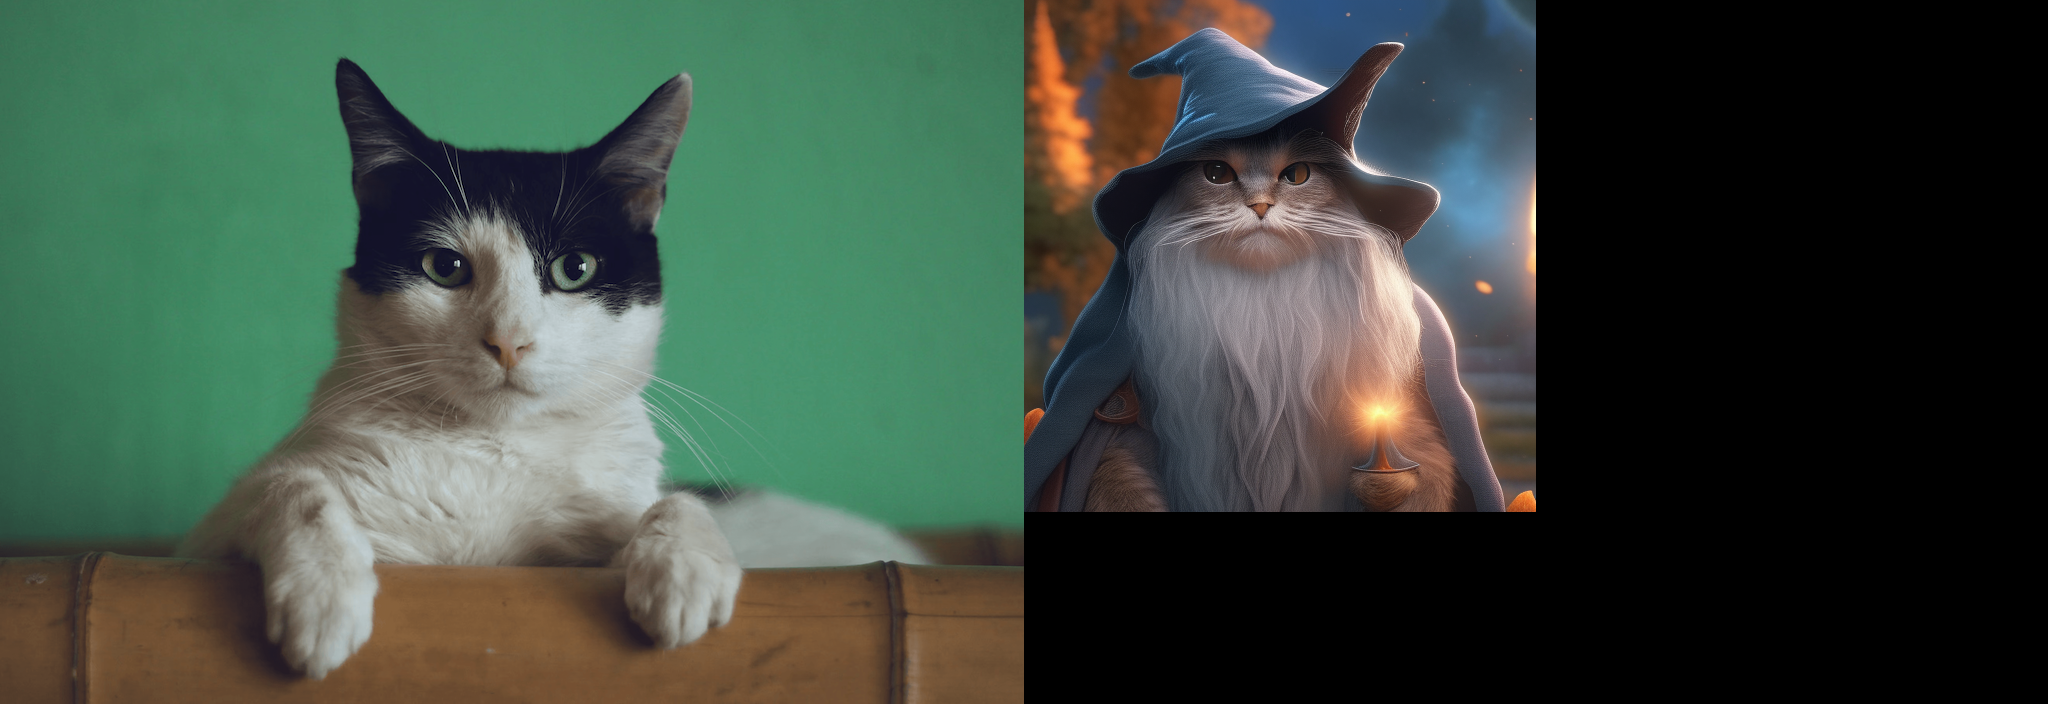

In [3]:
init_image = load_image(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png"
)
prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"
image = pipeline(prompt, image=init_image).images[0]
make_image_grid([init_image, image], rows=1, cols=2)